In [1]:
#Running on all the columns used in the multiple linear regression file
# 'GDP', 'Social_Support','Life_Expectancy (Happiness)', 
#         'Freedom_Score', 'Generosity','Corruption_Score',
#         'Beer_Servings','Spirit_Servings', 'Wine_Servings', 
#         'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 
#     'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 
#        'Population', 'thinness1-19years', 'Schooling'

In [2]:
#working from this walk through
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177816-understand-how-k-means-clustering-works

In [3]:
#Starting here:
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177851-carry-out-a-k-means-clustering

In [4]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 

#import the kmeans algorithm
from sklearn.cluster import KMeans

#import functions from the tutorial
from functions import *

In [5]:
#load the cleaned & scaled data
happy_df = pd.read_csv("Resources/Data/scaled_data.csv")
happy_data = happy_df[['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score', 'Beer_Servings', 'Wine_Servings','HDI', 'Schooling']]
happy_data.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Beer_Servings,Wine_Servings,HDI,Schooling
0,0.929138,0.979132,0.936153,0.973512,0.699468,0.262162,0.941983,0.833333
1,0.940905,0.980836,0.942685,0.975842,0.595745,0.751351,0.973629,0.941176
2,0.958889,0.967350,0.964818,0.944962,0.492021,0.756757,0.989451,0.784314
3,0.940779,1.000000,0.950464,0.973224,0.619681,0.210811,0.969409,0.931373
4,0.968310,0.977240,0.953078,0.980259,0.449468,0.348649,1.000000,0.867647


In [6]:
#load the cleaned & scaled data
full_data = happy_df[['GDP', 'Social_Support','Life_Expectancy (Happiness)', 
        'Freedom_Score', 'Generosity','Corruption_Score',
        'Beer_Servings','Spirit_Servings', 'Wine_Servings', 
        'Adult_Mortality', 'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 
    'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 
       'Population', 'thinness1-19years', 'Schooling']]
full_data.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Adult_Mortality,...,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling
0,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,0.157025,...,0.817223,0.000022,0.869748,0.0,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333
1,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,0.146694,...,0.817223,0.000100,0.823529,0.0,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176
2,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,0.101240,...,0.817223,0.000387,0.803922,0.0,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314
3,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,0.101240,...,0.817223,0.000000,0.854342,0.0,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373
4,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,0.121901,...,0.817223,0.000155,0.857143,0.0,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647


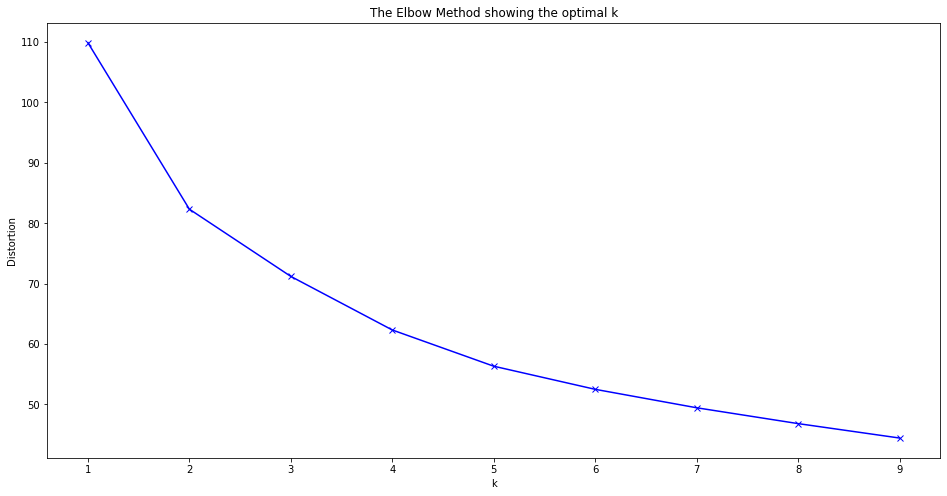

In [7]:
#Running elbow method on the limited data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(full_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [8]:
# Moving to next step of the tutorial, "Analyze the Results of a K-means Clustering"
#https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering

In [15]:
#Skipped the steps scaling & cleaning the data as we already performed this
#First using 2 clusters based on the elbow method done above. Not sure if best or not

#Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

#Fit the data to the model
kmeans.fit(full_data)

#Determine which clusters each data point belongs to:
clusters = kmeans.predict(full_data)

In [16]:
#et's add a new column, cluster number to the original data so we can see what countries sit in what cluster:

#Add cluster number to the original data
full_clustered = pd.DataFrame(full_data, columns=full_data.columns, index = full_data.index)
full_clustered['cluster'] = clusters

full_clustered.head()

,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Beer_Servings,Spirit_Servings,Wine_Servings,Adult_Mortality,...,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,Population,thinness1-19years,Schooling,cluster
0,0.929138,0.979132,0.936153,0.973512,-0.106092,0.208901,0.699468,0.356568,0.262162,0.157025,...,0.000022,0.869748,0.0,0.979798,0.979798,0.010753,0.021225,0.033708,0.833333,0
1,0.940905,0.980836,0.942685,0.975842,0.118077,0.180090,0.595745,0.217158,0.751351,0.146694,...,0.000100,0.823529,0.0,0.939394,0.939394,0.010753,0.022015,0.041199,0.941176,0
2,0.958889,0.967350,0.964818,0.944962,0.188903,0.324640,0.492021,0.268097,0.756757,0.101240,...,0.000387,0.803922,0.0,0.979798,0.979798,0.010753,0.032082,0.014981,0.784314,0
3,0.940779,1.000000,0.950464,0.973224,0.440450,0.760711,0.619681,0.163539,0.210811,0.101240,...,0.000000,0.854342,0.0,0.929293,0.929293,0.010753,0.000131,0.037453,0.931373,0
4,0.968310,0.977240,0.953078,0.980259,0.239952,0.281341,0.449468,0.190349,0.348649,0.121901,...,0.000155,0.857143,0.0,0.959596,0.959596,0.010753,0.002010,0.029963,0.867647,0


In [17]:
from sklearn.decomposition import PCA

#Create a PCA model to reduce our data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca.fit(full_data)

#Transfer the scaled data to the new PCA space
full_reduced = pca.transform(full_data)

In [18]:
#Convert to a data frame
full_reduced_df = pd.DataFrame(full_reduced, index = full_data.index, columns=['PC1', 'PC2'])
full_reduced_df['cluster'] = clusters
full_reduced_df.head()

,PC1,PC2,cluster
0,-0.795165,0.075623,0
1,-0.806836,0.002399,0
2,-0.768185,-0.062521,0
3,-0.631998,-0.070314,0
4,-0.683075,-0.125703,0


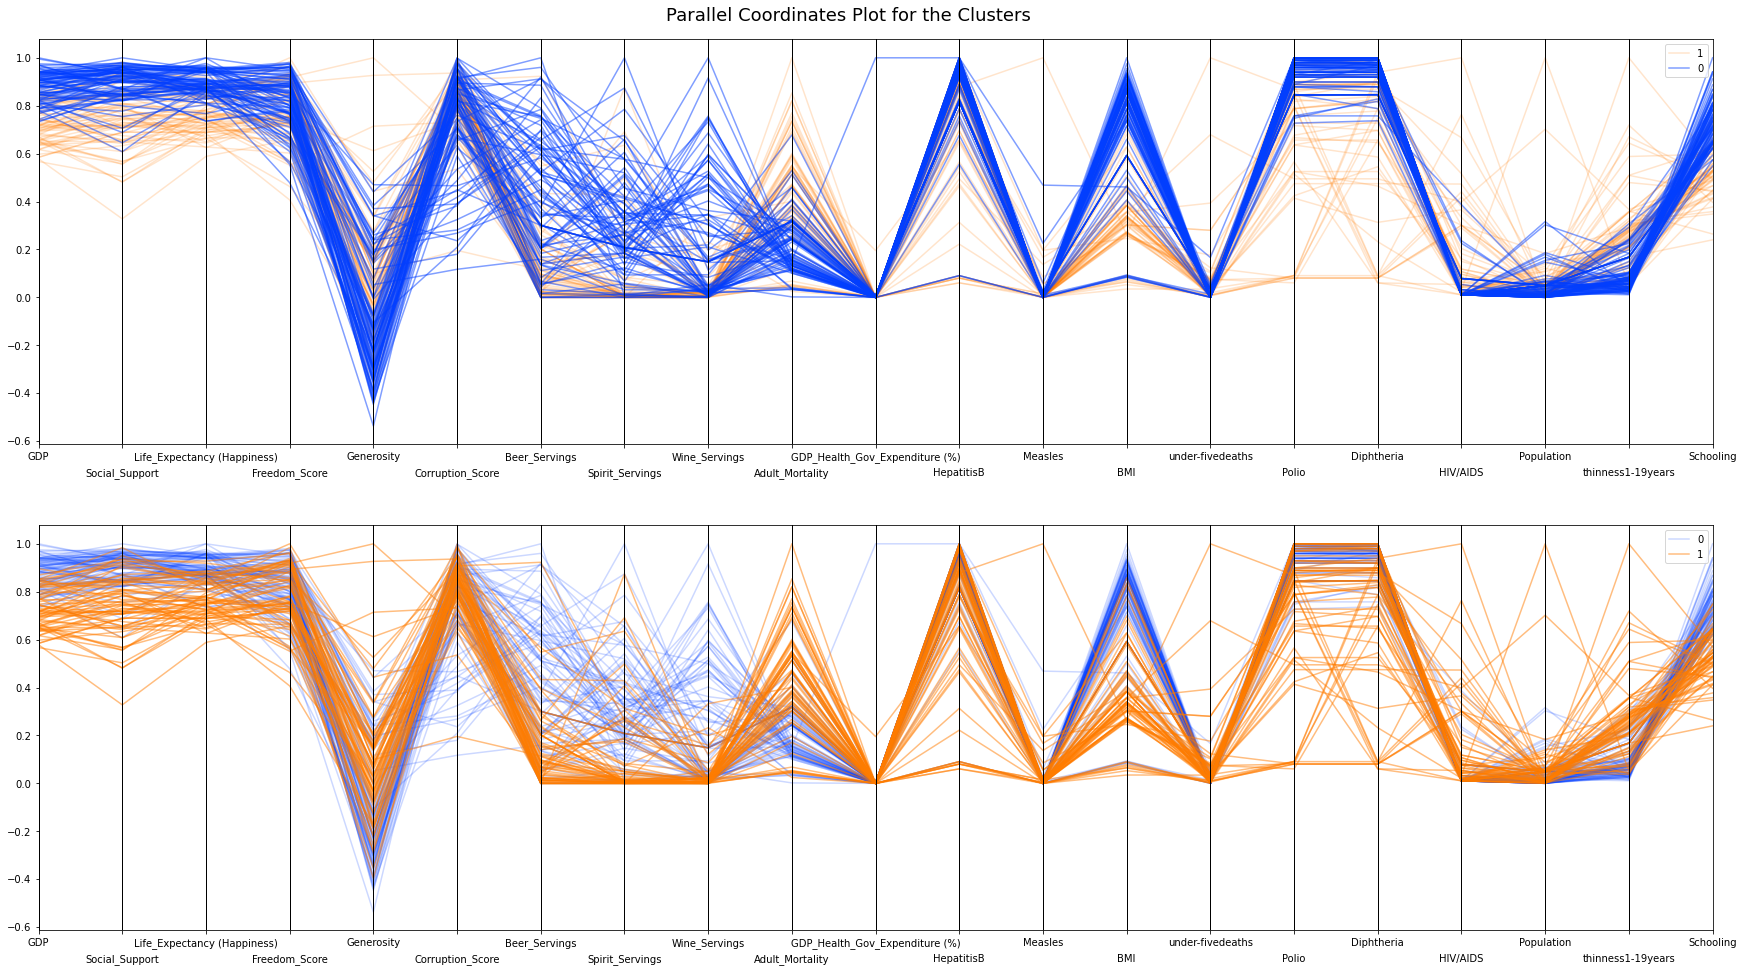

In [19]:
#display parallel coordinates plots, one for each cluster
display_parallel_coordinates(full_clustered, 2)

In [14]:
#Analyzing the clusters
#Difficult to analyze and not sure if it is helpful to look at the data like this

#Group 0 (blue):
## Highs: Adult Mortality, Hepatitis, Polio, Diptheria,
## Lows:

#Group 1 (orange):
## Highs: GDP, Social Support, Life Expectancy, Freedom Score, Beer Servings, Wine Servings, HDI, Schooling
## Lows: